# 目录
## 0 数据获取
## 1 数据整体理解
- 1.1 字段含义
- 1.2 字段整体信息

## 2 数据探索
- 2.1 因变量分布探索
- 2.2 连续型自变量探索
  - 2.2.1 相关矩阵
  - 2.2.2 saleprice高相关变量 相关系数矩阵
  - 2.2.2 saleprice高相关变量 散点图
- 2.3 分类型自变量探索
  - 2.3.1 一元方差分析
  - 2.3.2 重要变量可视化展示

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy.stats import norm
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew
from scipy.stats import pearsonr

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 数据获取

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

数据源链接

In [2]:
train = pd.read_csv("data/train.csv")
evaluate = pd.read_csv("data/test.csv")
train.shape
evaluate.shape

(1460, 81)

(1459, 80)

# 数据整体理解

In [3]:
train.info() # 字段含义参考data_description.txt文件

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2 数据探索

## 2.1 因变量探索 
分析 “房价”

In [4]:
# 概览
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice Distribution with Normal Fit')

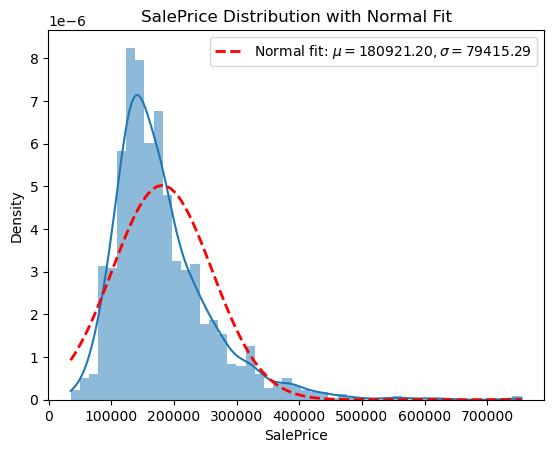

In [5]:
# 分布
# -----fixed-------
# sns.distplot(train['SalePrice'], fit=norm) #`distplot` is a deprecated function and will be removed in seaborn v0.14.0.
# Please adapt your code to use either `displot` (a figure-level function with
# similar flexibility) or `histplot` (an axes-level function for histograms).
# -----update ↓------- 使用histplot
# 1. 绘制直方图
ax = sns.histplot(
    train['SalePrice'],  # 数据列
    kde=True,            # 显示核密度估计曲线（对应distplot的默认KDE）
    stat='density',      # 纵轴用密度（而非计数），方便和正态曲线对齐
    linewidth=0          # 隐藏直方图边框
)

# 2. 手动计算正态分布的参数（均值、标准差），生成拟合曲线
mu, sigma = norm.fit(train['SalePrice']) # 拟合数据，得到正态分布的均值(mu)和标准差(sigma)
x = np.linspace(train['SalePrice'].min(), train['SalePrice'].max(), 100)
y = norm.pdf(x, mu, sigma)

# 3. 叠加正态分布拟合曲线
ax.plot(x, y, 'r--', linewidth=2, label=f'Normal fit: $\mu={mu:.2f}, \sigma={sigma:.2f}$')

# 4. 加图例、标题
ax.legend()
ax.set_title('SalePrice Distribution with Normal Fit')
plt.show()

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

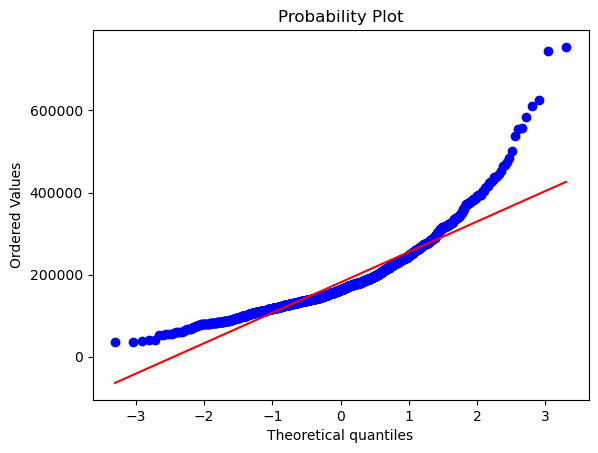

In [6]:
# 利用Q-Q图判断数据是否偏离正态分布
stats.probplot(train['SalePrice'], plot=plt)

## 2.2 数值型自变量探索

### 2.2.1 相关系数矩阵

In [7]:
# DataFrame.corr()方法可以给出两个列之间的相关性，我们利用该方法用于检测特征和目标变量之间的相关性。
corr = train.select_dtypes(include = [np.number]).iloc[:, 1:].corr()

In [8]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


<Figure size 1200x1200 with 0 Axes>

<Axes: >

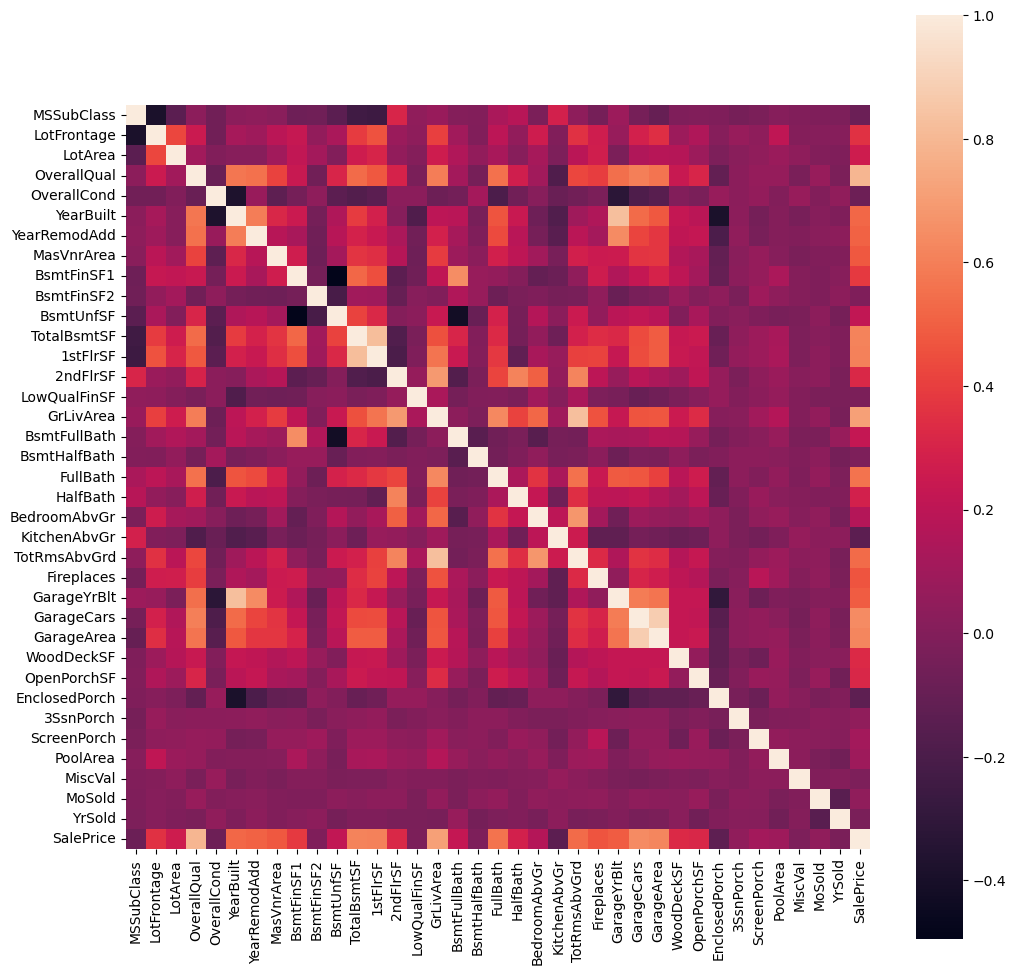

In [9]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax = 1, square = True)

热力图的方式能够非常直观的看到所有变量之间的相关性分布

首先两个红色的方块,第一个是 TotalBsmtSF 和 1stFlrSF 变量的相关系数，第二个是 GarageX 变量群。这两个示例都显示了这些变量之间很强的相关性。实际上，相关性的程度达到了一种多重共线性的情况。我们可以总结出这些变量几乎包含相同的信息，所以确实出现了多重共线性。

另一个引起注意的地方是 SalePrice 的相关性。我们可以看到GrLivArea，TotalBsmtSF和 OverallQual 的相关性很强，除此之外也有很多其他的变量应该进行考虑，这也是我们下一步的内容。

### 2.2.2 与saleprice高相关变量 相关系数矩阵

<Figure size 1200x1200 with 0 Axes>

<Axes: >

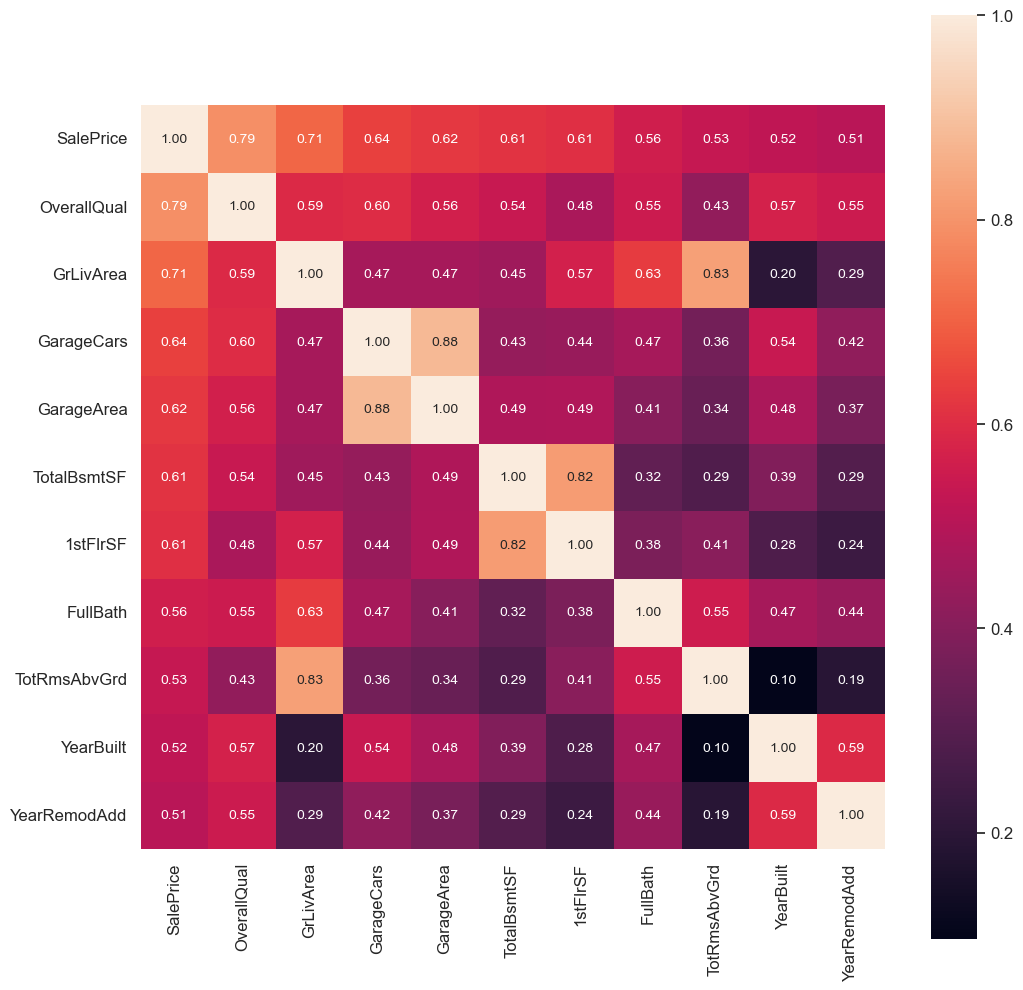

In [10]:
# 选取绝对值>corr_threshvalue的变量做分析
corr_threshvalue = 0.5 # 阈值
corr_cols = corr.loc[:, corr.loc['SalePrice',:].abs() > corr_threshvalue].sort_values(by='SalePrice', axis=1 , ascending=False).columns
corr_thresh = train[corr_cols].corr()

plt.figure(figsize=(12, 12))
# sns.set(font_scale=1.25) 不推荐全局设置
# 使用精细设置
sns.set_theme(
    style="whitegrid",  # 可选：设置绘图风格（和原sns.set()一致）
    rc={
        # 精细化设置不同元素的字体大小（替代全局font_scale）
        "font.size": 12,          # 基础字体大小（对应font_scale的基准）
        "axes.labelsize": 15,     # 轴标签字体大小（12*1.25=15）
        "axes.titlesize": 18,     # 标题字体大小（12*1.5=18，可自定义）
        "xtick.labelsize": 12,    # x轴刻度字体大小
        "ytick.labelsize": 12,    # y轴刻度字体大小
        "legend.fontsize": 12,    # 图例字体大小
    }
)

sns.heatmap(corr_thresh, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

从图中可以看出：

OverallQual相关性最强

GrLivArea 与 TotRmsAbvGrd是相关性比较强的变量，可以只保留GrLivArea

GarageCars 和 GarageArea 也是相关性比较强的变量. 车库中存储的车的数量是由车库的面积决定的，所以只保留GarageCars

TotalBsmtSF  和 1stFloor 与上述情况相同，我们选择 TotalBsmtS 。
 
FullBath、YearBuilt、YearRemodAdd 和 SalePrice 相关性一般。

### 2.2.3 与saleprice高相关变量 散点图

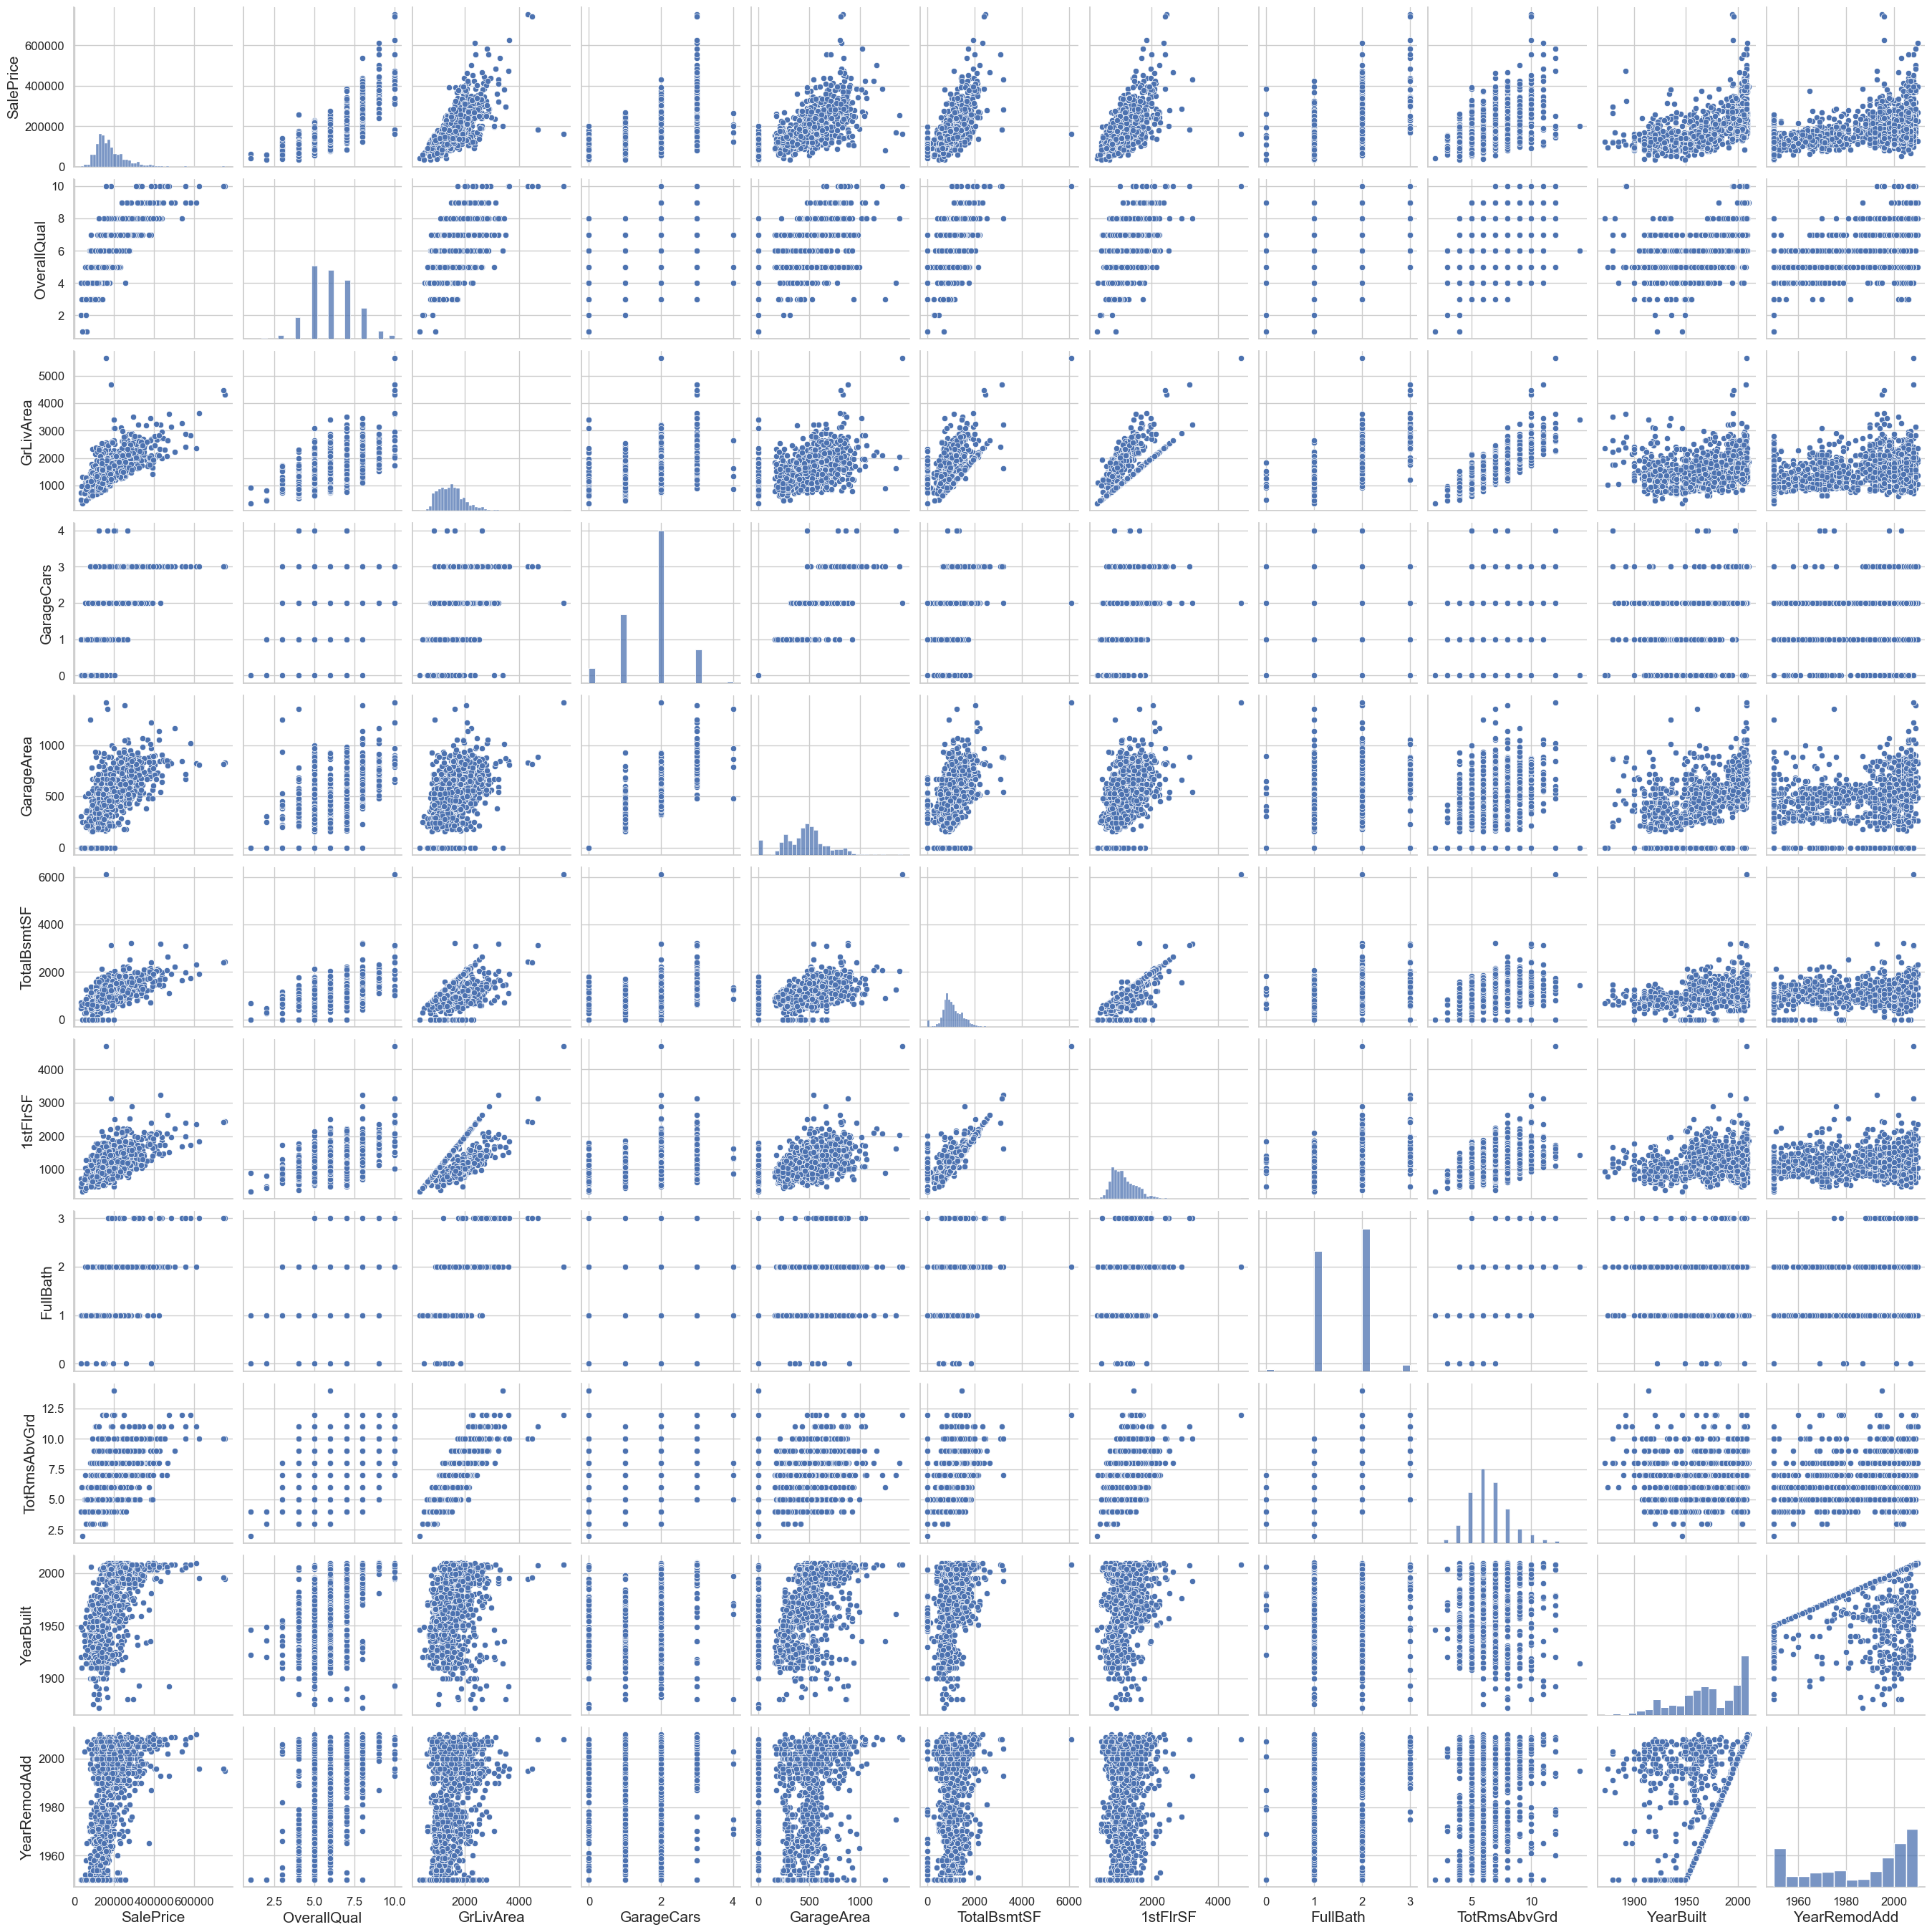

In [11]:
sns.pairplot(train[corr_cols], height = 2.5)

尽管我们已经知道了一些主要特征，这一丰富的散点图给了我们一个关于变量关系的合理想法。
其中，TotalBsmtSF 和 GrLiveArea 之间的散点图是很有意思的。我们可以看出这幅图中，一些点组成了线，就像边界一样。大部分点都分布在那条线下面，这也是可以解释的。地下室面积和地上居住面积可以相等，但是一般情况下不会希望有一个比地上居住面积还大的地下室。

SalePrice 和 YearBuilt 之间的散点图也值得我们思考。在 “点云” 的底部，我们可以观察到一个几乎呈指数函数的分布。我们也可以看到 “点云” 的上端也基本呈同样的分布趋势。并且可以注意到，近几年的点有超过这个上端的趋势。

## 2.3 分类型自变量探索

In [12]:
# 类别性变量选取
train_cate = train.select_dtypes(include = 'object').iloc[:, 0:]

In [13]:
train_cate.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
# 每个分类型变量对应的不同取值个数
train_cate.apply(lambda x : x.nunique())

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

### 2.3.1 方差分析

In [15]:
# 一元方差分析（类型变量）
def anova(train_cate_y, categorical,y):
    anv = pd.DataFrame(index = categorical)
    anv['feature'] = categorical
    pvals = [] # 存P值
    for c in categorical:
        samples = [] # 初始化空列表，存储该特征不同取值对应的目标变量样本
        # 遍历该特征的所有非空唯一取值
        for cls in train_cate_y[c].dropna().unique():
            # 提取该特征取值为cls时，目标变量y的所有值
            s = train_cate_y[train_cate_y[c] == cls][y].values
            samples.append(s)
        # 执行一元方差分析（F检验），返回(F值, P值)，取第二个值即P值
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [16]:
# 定义方差齐性检验函数（Levene检验，对非正态分布更稳健）
def levene_test(train_cate_y, categorical, y):
    levene_results = []
    for c in categorical:
        samples = []
        for cls in train_cate_y[c].dropna().unique():
            s = train_cate_y[train_cate_y[c] == cls][y].values
            samples.append(s)
        stat, pval = stats.levene(*samples)
        levene_results.append({
            'feature': c,
            'levene_stat':stat,
            'levene_pval':pval,
            'homoscedastic': 'Yes' if pval > 0.05 else 'No' # 方差齐性标记
        })
    return pd.DataFrame(levene_results).set_index('feature')

<Axes: xlabel='feature', ylabel='disparity'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, 'Neighborhood'),
  Text(1, 0, 'ExterQual'),
  Text(2, 0, 'KitchenQual'),
  Text(3, 0, 'BsmtQual'),
  Text(4, 0, 'GarageFinish'),
  Text(5, 0, 'Foundation'),
  Text(6, 0, 'HeatingQC'),
  Text(7, 0, 'GarageType'),
  Text(8, 0, 'BsmtFinType1'),
  Text(9, 0, 'SaleCondition'),
  Text(10, 0, 'Exterior1st'),
  Text(11, 0, 'Exterior2nd'),
  Text(12, 0, 'BsmtExposure'),
  Text(13, 0, 'SaleType'),
  Text(14, 0, 'MSZoning'),
  Text(15, 0, 'HouseStyle'),
  Text(16, 0, 'LotShape'),
  Text(17, 0, 'CentralAir'),
  Text(18, 0, 'FireplaceQu'),
  Text(19, 0, 'Electrical'),
  Text(20, 0, 'PavedDrive'),
  Text(21, 0, 'RoofStyle'),
  Text(22, 0, 'MasVnrType'),
  Text(23, 0, 'BldgType'),
  Text(24, 0, 'BsmtCond'),
  Text(25, 0, 'LandContour'),
  Text

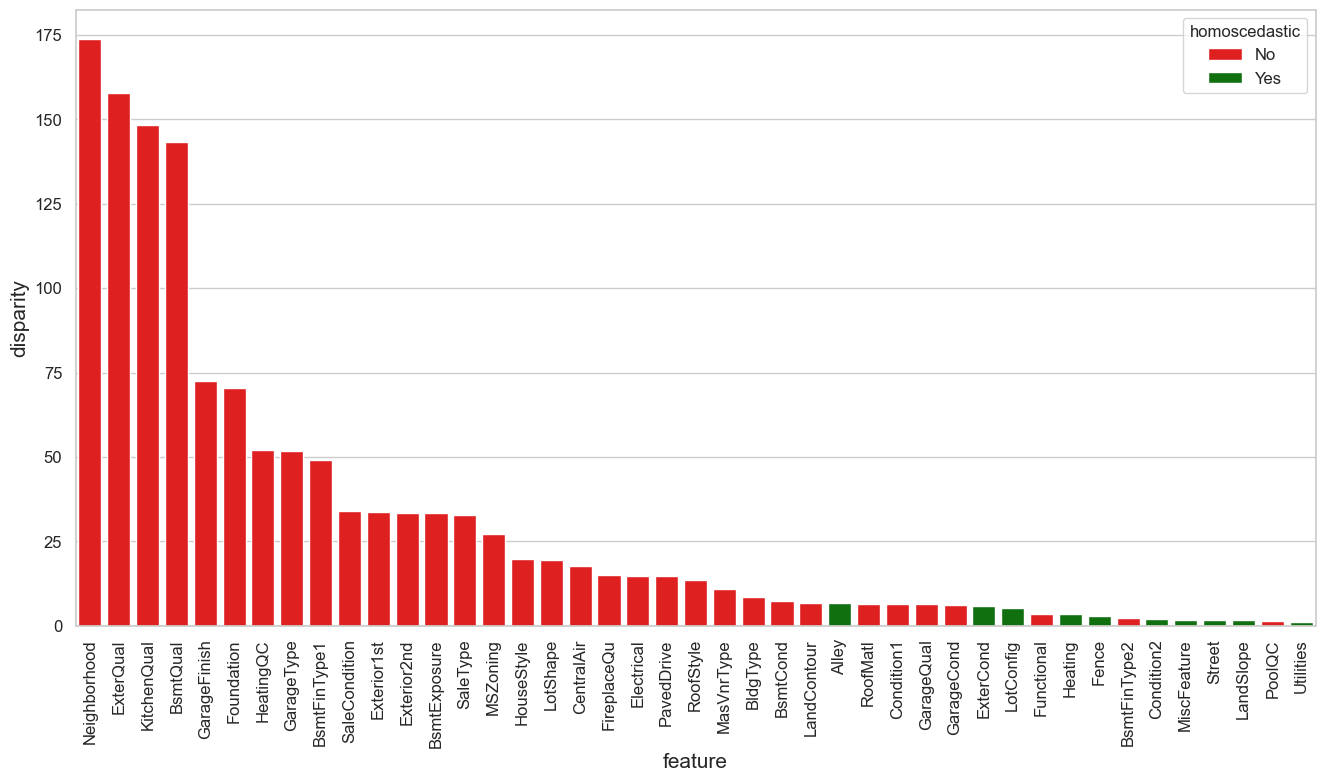

In [23]:
categorical = [column for column in train.columns if train.dtypes[column] == 'object'] # 类型变量集合
y = 'SalePrice'

levene_df = levene_test(train, categorical, y)
anova_df = anova(train, categorical, y)

corr_cate = pd.merge(anova_df, levene_df, left_index = True, right_index = True) # 合并结果
corr_cate['disparity'] = np.log(20*1./corr_cate['pval'].values)/np.log(20)  # 计算区分度

fig, ax = plt.subplots(figsize=(16,8))
# sns.barplot(data=corr_cate, x='feature', y='disparity')
# plt.xticks(rotation=90)
# plt.show()

# update：增加方差齐性检验, 但看起来似乎这个一元方差分析不可靠
sns.barplot(
    data = corr_cate.reset_index(),
    x = 'feature',
    y = 'disparity',
    hue = 'homoscedastic', # 颜色区分方差齐性
    palette = {'Yes': 'green', 'No': 'red'}
)
plt.xticks(rotation=90)
plt.show()

In [24]:
corr_cate

,feature,pval,levene_stat,levene_pval,homoscedastic,disparity
Neighborhood,Neighborhood,1.558600e-225,12.204777,3.362249e-43,No,173.791762
ExterQual,ExterQual,1.439551e-204,51.647224,1.012596e-31,No,157.677228
KitchenQual,KitchenQual,3.032213e-192,75.908894,1.279288e-45,No,148.205092
BsmtQual,BsmtQual,9.610615e-186,57.444997,4.781973e-35,No,143.208288
GarageFinish,GarageFinish,1.199117e-93,66.588543,2.490136e-28,No,72.421212
Foundation,Foundation,5.791895e-91,21.017081,2.471815e-20,No,70.358262
HeatingQC,HeatingQC,2.667062e-67,25.710861,1.294766e-20,No,52.170201
GarageType,GarageType,1.247154e-66,20.007021,2.666183e-19,No,51.655312
BsmtFinType1,BsmtFinType1,1.807731e-63,21.919971,3.351097e-21,No,49.225534
SaleCondition,SaleCondition,7.988268e-44,8.540863,5.537686e-08,No,34.125714


stats.f_oneway 返回的 pval > 0.05，基本就意味着量集合的相似

由上图示分析可见，不少离散变量的具体取值对最终房价会产生较大影响（例如Neighborhood这个变量，实际上暗含了地段这个影响房价的重要因素），这些重要的特征在特征选取时应予以保留。

### 2.3.2 重要变量可视化展示

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

(-0.5, 24.5, 0.0, 800000.0)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

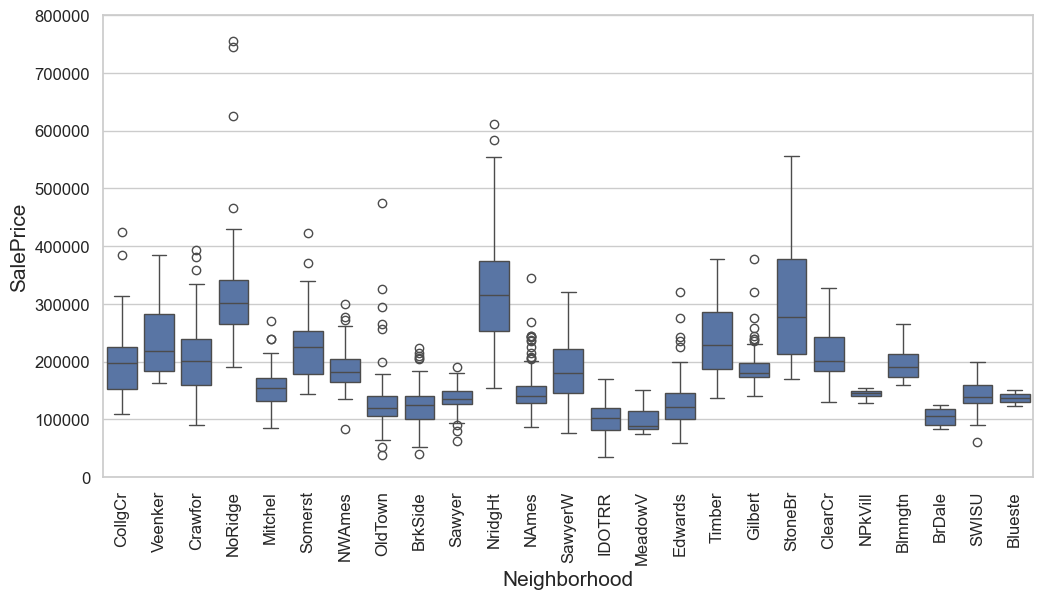

In [25]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train)
plt.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

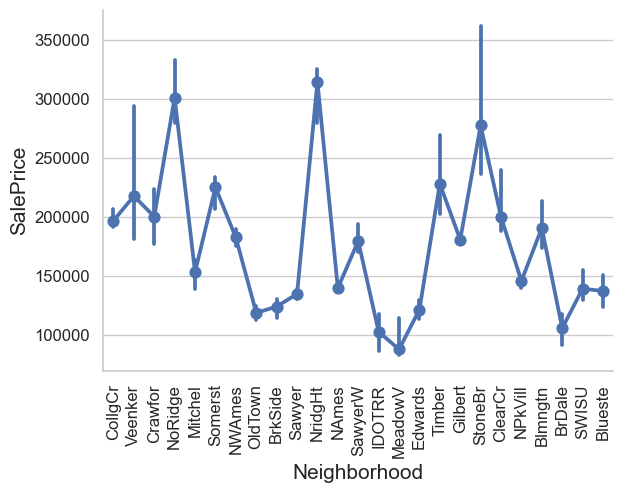

In [30]:
# sns.factorplot('Neighborhood', 'SalePrice', estimator = np.median, 
#                size = 4.5, aspect = 1.4, data = train)
sns.catplot(x = 'Neighborhood', y = 'SalePrice', estimator = np.median, 
               height = 4.5, aspect = 1.4, kind = 'point', data = train)
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

C:\Users\lenovo\AppData\Local\Temp\ipykernel_34700\1395100729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Neighborhood', data = train, palette = palette)


<Axes: xlabel='Neighborhood', ylabel='count'>

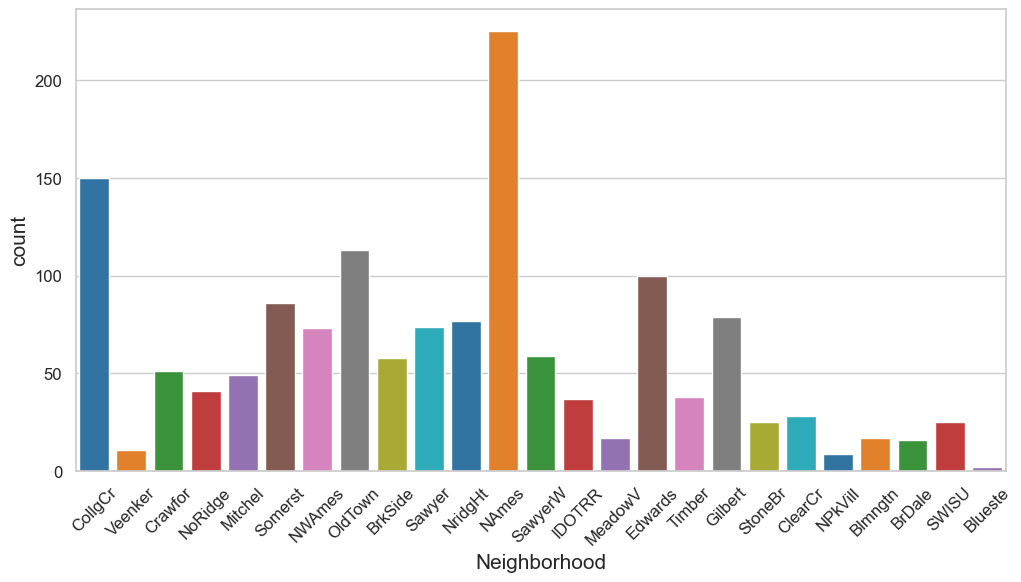

In [32]:
plt.figure(figsize = (12, 6))
n_categories = train['Neighborhood'].nunique()
palette = sns.color_palette("tab10", n_categories)
sns.countplot(x = 'Neighborhood', data = train, palette = palette)
xt = plt.xticks(rotation=45)

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='ExterQual', ylabel='SalePrice'>

([0, 1, 2, 3],
 [Text(0, 0, 'Gd'), Text(1, 0, 'TA'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

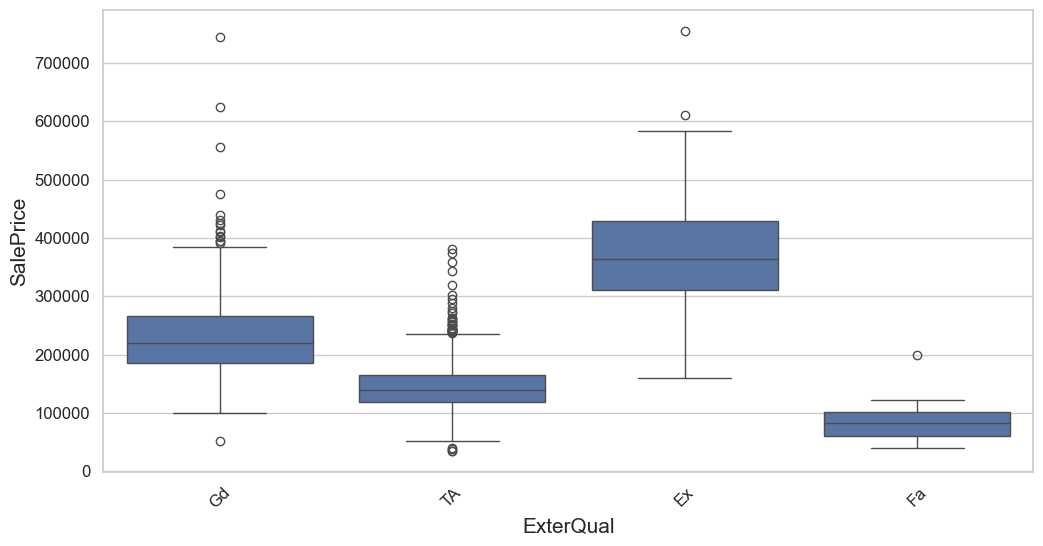

In [33]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'ExterQual', y = 'SalePrice',  data = train)
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Gd'), Text(1, 0, 'TA'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

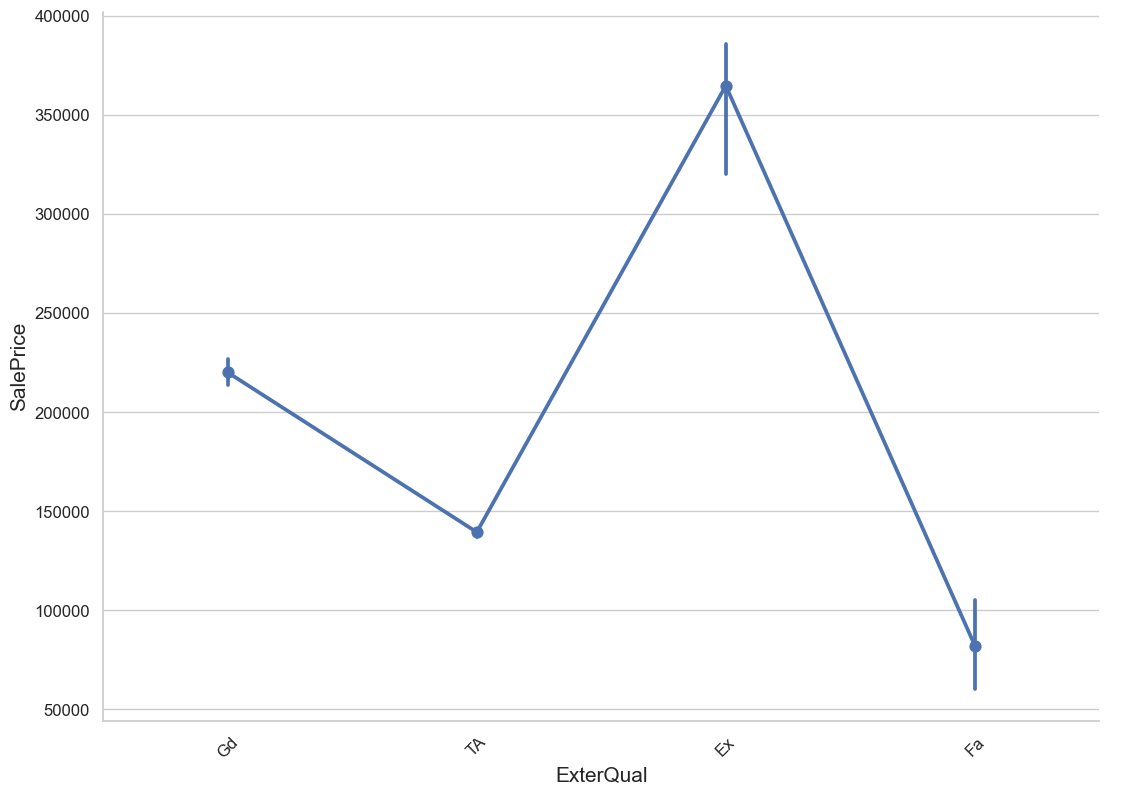

In [35]:
sns.catplot(x = 'ExterQual', y = 'SalePrice', estimator = np.median, 
               height = 8, aspect = 1.4, kind = 'point', data = train)
plt.xticks(rotation=45)

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='ExterQual', ylabel='count'>

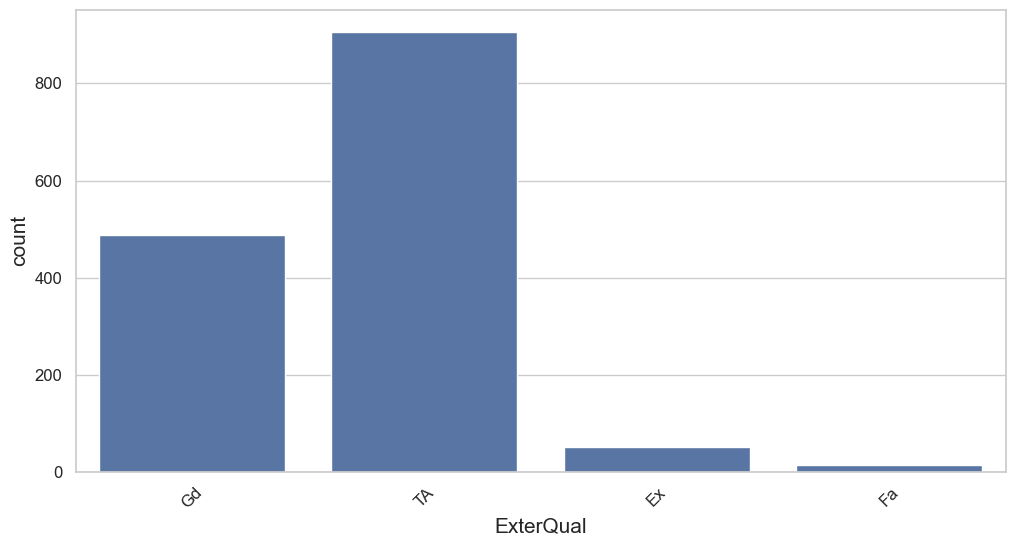

In [36]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'ExterQual', data = train)
xt = plt.xticks(rotation=45)

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Utilities', ylabel='SalePrice'>

([0, 1], [Text(0, 0, 'AllPub'), Text(1, 0, 'NoSeWa')])

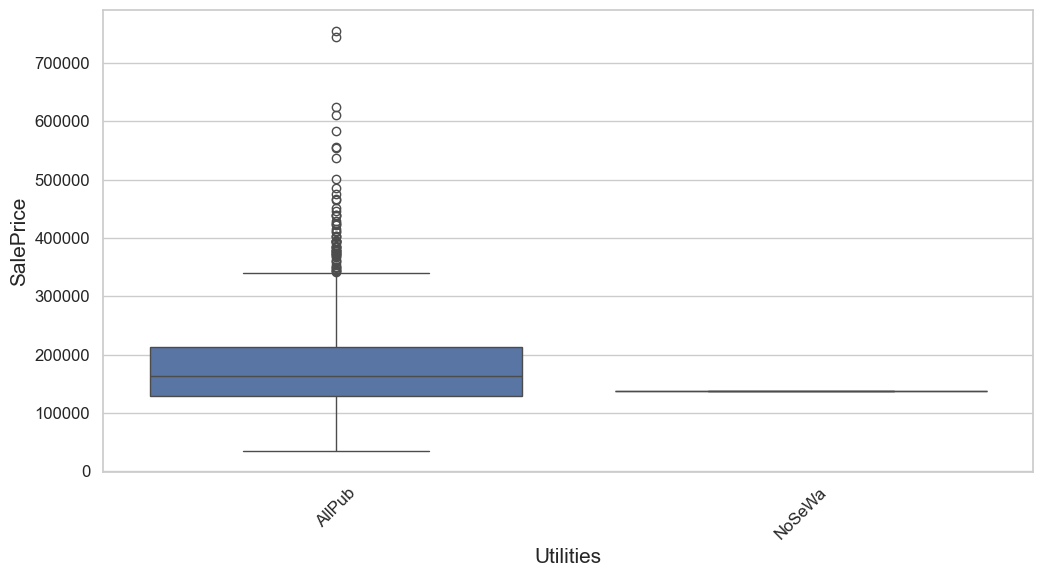

In [37]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Utilities', y = 'SalePrice',  data = train)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'AllPub'), Text(1, 0, 'NoSeWa')])

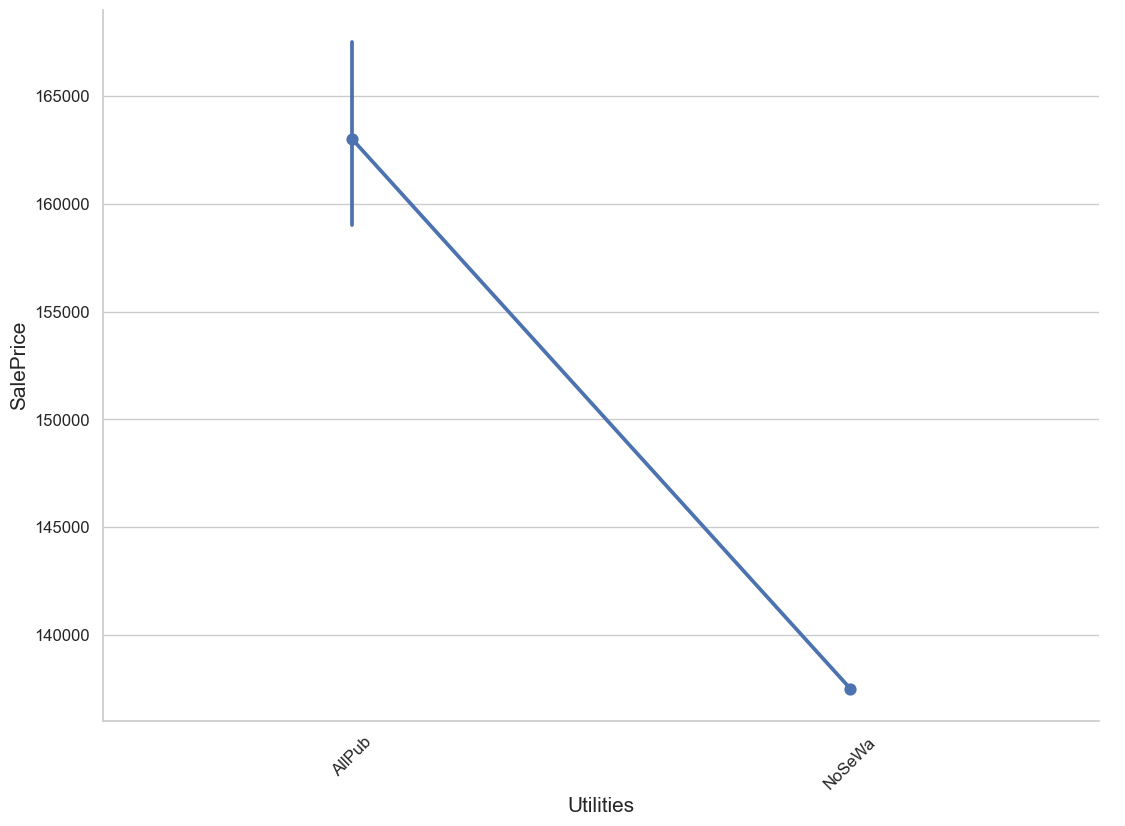

In [39]:
sns.catplot(x = 'Utilities', y = 'SalePrice', estimator = np.median, 
               height = 8, aspect = 1.4, kind = 'point', data = train)
plt.xticks(rotation=45)

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Utilities', ylabel='count'>

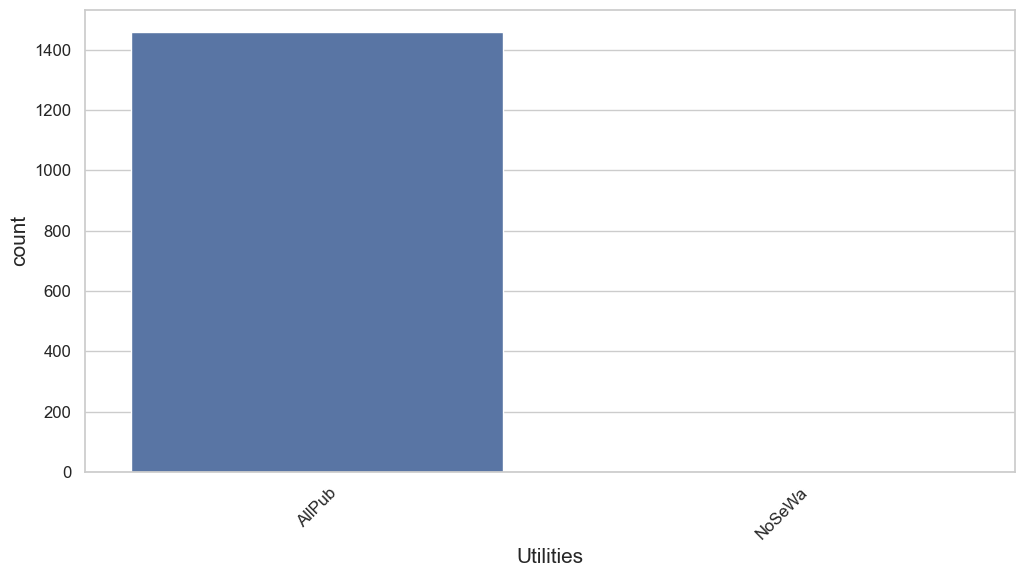

In [40]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Utilities', data = train)
xt = plt.xticks(rotation=45)